# Exploratory Data Analysis (EDA)

### Problem:

The problem is to predict the price of a house based on the given features. The dataset is taken from [Udacity](https://www.udacity.com/)'s [Machine Learning DevOps Engineer](https://www.udacity.com/course/machine-learning-dev-ops-engineer-nanodegree--nd0821) Nanodegree Program.

Before we start modeling, we need to understand the data. This is where EDA comes in. EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

In this notebook, we will check the data types of the features, check for missing values, check for outliers, check for skewness, check for correlation between features, check for multicollinearity, etc.



###  Importing Libraries and getting Data from WandB

In [24]:
import wandb
import pandas as pd

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

In [25]:
# Check data dimension
df.shape

(20000, 16)

In [26]:
# Check data type
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [27]:
# Check the first 5 rows
df.head()

id                                               name    host_id  \
0   9138664                Private Lg Room 15 min to Manhattan   47594947   
1  31444015  TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...    8523790   
2   8741020  Voted #1 Location Quintessential 1BR W Village...   45854238   
3  34602077  Spacious 1 bedroom apartment 15min from Manhattan  261055465   
4  23203149   Big beautiful bedroom in huge Bushwick apartment     143460   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0      Iris              Queens       Sunnyside  40.74271  -73.92493   
1    Johlex           Manhattan  Hell's Kitchen  40.76682  -73.98878   
2      John           Manhattan    West Village  40.73631  -74.00611   
3     Regan              Queens         Astoria  40.76424  -73.92351   
4     Megan            Brooklyn        Bushwick  40.69839  -73.92044   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     74               2                  6  2019-05-26   
1  Entire home/apt    170               3                  0         NaN   
2  Entire home/apt    245               3                 51  2018-09-19   
3  Entire home/apt    125               3                  1  2019-05-24   
4     Private room     65               2                  8  2019-06-23   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.13                               1                 5  
1                NaN                               1               188  
2               1.12                               1                 0  
3               0.65                               1                13  
4               0.52                               2                 8

The first thing that we see is that "last_review" column is of type object. We need to convert it to datetime format. 

In [28]:
df['last_review'] = pd.to_datetime(df['last_review'])
df.head()

id                                               name    host_id  \
0   9138664                Private Lg Room 15 min to Manhattan   47594947   
1  31444015  TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...    8523790   
2   8741020  Voted #1 Location Quintessential 1BR W Village...   45854238   
3  34602077  Spacious 1 bedroom apartment 15min from Manhattan  261055465   
4  23203149   Big beautiful bedroom in huge Bushwick apartment     143460   

  host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0      Iris              Queens       Sunnyside  40.74271  -73.92493   
1    Johlex           Manhattan  Hell's Kitchen  40.76682  -73.98878   
2      John           Manhattan    West Village  40.73631  -74.00611   
3     Regan              Queens         Astoria  40.76424  -73.92351   
4     Megan            Brooklyn        Bushwick  40.69839  -73.92044   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room     74               2                  6  2019-05-26   
1  Entire home/apt    170               3                  0         NaT   
2  Entire home/apt    245               3                 51  2018-09-19   
3  Entire home/apt    125               3                  1  2019-05-24   
4     Private room     65               2                  8  2019-06-23   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.13                               1                 5  
1                NaN                               1               188  
2               1.12                               1                 0  
3               0.65                               1                13  
4               0.52                               2                 8

Now, we will do EDA using pandas profiling. Pandas profiling is a library that generates an automated report of the following:

1. Descriptive statistics 
2. Correlations  
3. Missing values  
4. Histograms  
5. Most frequent values  
6. Correlations between variables  
7. Scatter plots between variables


and much more.

In [29]:
import pandas_profiling

profile = pandas_profiling.ProfileReport(df)
profile.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:03<00:00,  3.12s/it]


Doing some more EDA using:
1. pandas describe and info 
2. seaborn pairplot

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
id_columns = [
    'id',
    'host_id'
]
numeric_columns = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
date_columns = [
    "last_review"
]
categorical_columns = [
    'name',
    'host_name',
    'neighbourhood_group',
    'neighbourhood',
    'room_type',
]

In [32]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              20000 non-null  int64         
 1   name                            19993 non-null  object        
 2   host_id                         20000 non-null  int64         
 3   host_name                       19992 non-null  object        
 4   neighbourhood_group             20000 non-null  object        
 5   neighbourhood                   20000 non-null  object        
 6   latitude                        20000 non-null  float64       
 7   longitude                       20000 non-null  float64       
 8   room_type                       20000 non-null  object        
 9   price                           20000 non-null  int64         
 10  minimum_nights                  20000 non-null  int64         
 11  nu

In [33]:
df[numeric_columns].describe()


latitude     longitude         price  minimum_nights  \
count  20000.000000  20000.000000  20000.000000    20000.000000   
mean      40.728455    -73.952125    153.269050        6.992100   
std        0.054755      0.046559    243.325609       21.645449   
min       40.508730    -74.239140      0.000000        1.000000   
25%       40.689420    -73.983030     69.000000        1.000000   
50%       40.722730    -73.955640    105.000000        2.000000   
75%       40.762990    -73.936380    175.000000        5.000000   
max       40.913060    -73.717950  10000.000000     1250.000000   

       number_of_reviews  reviews_per_month  calculated_host_listings_count  \
count       20000.000000       15877.000000                    20000.000000   
mean           23.274100           1.377446                        6.955450   
std            44.927793           1.683006                       32.433831   
min             0.000000           0.010000                        1.000000   
25%             1.000000           0.190000                        1.000000   
50%             5.000000           0.720000                        1.000000   
75%            23.000000           2.010000                        2.000000   
max           607.000000          27.950000                      327.000000   

       availability_365  
count      20000.000000  
mean         112.901200  
std          131.762226  
min            0.000000  
25%            0.000000  
50%           44.000000  
75%          229.000000  
max          365.000000

Clearly, there are some outliers in the data. We can see that "price" and "minimun_nights" have outliers. We will remove them in the next section.

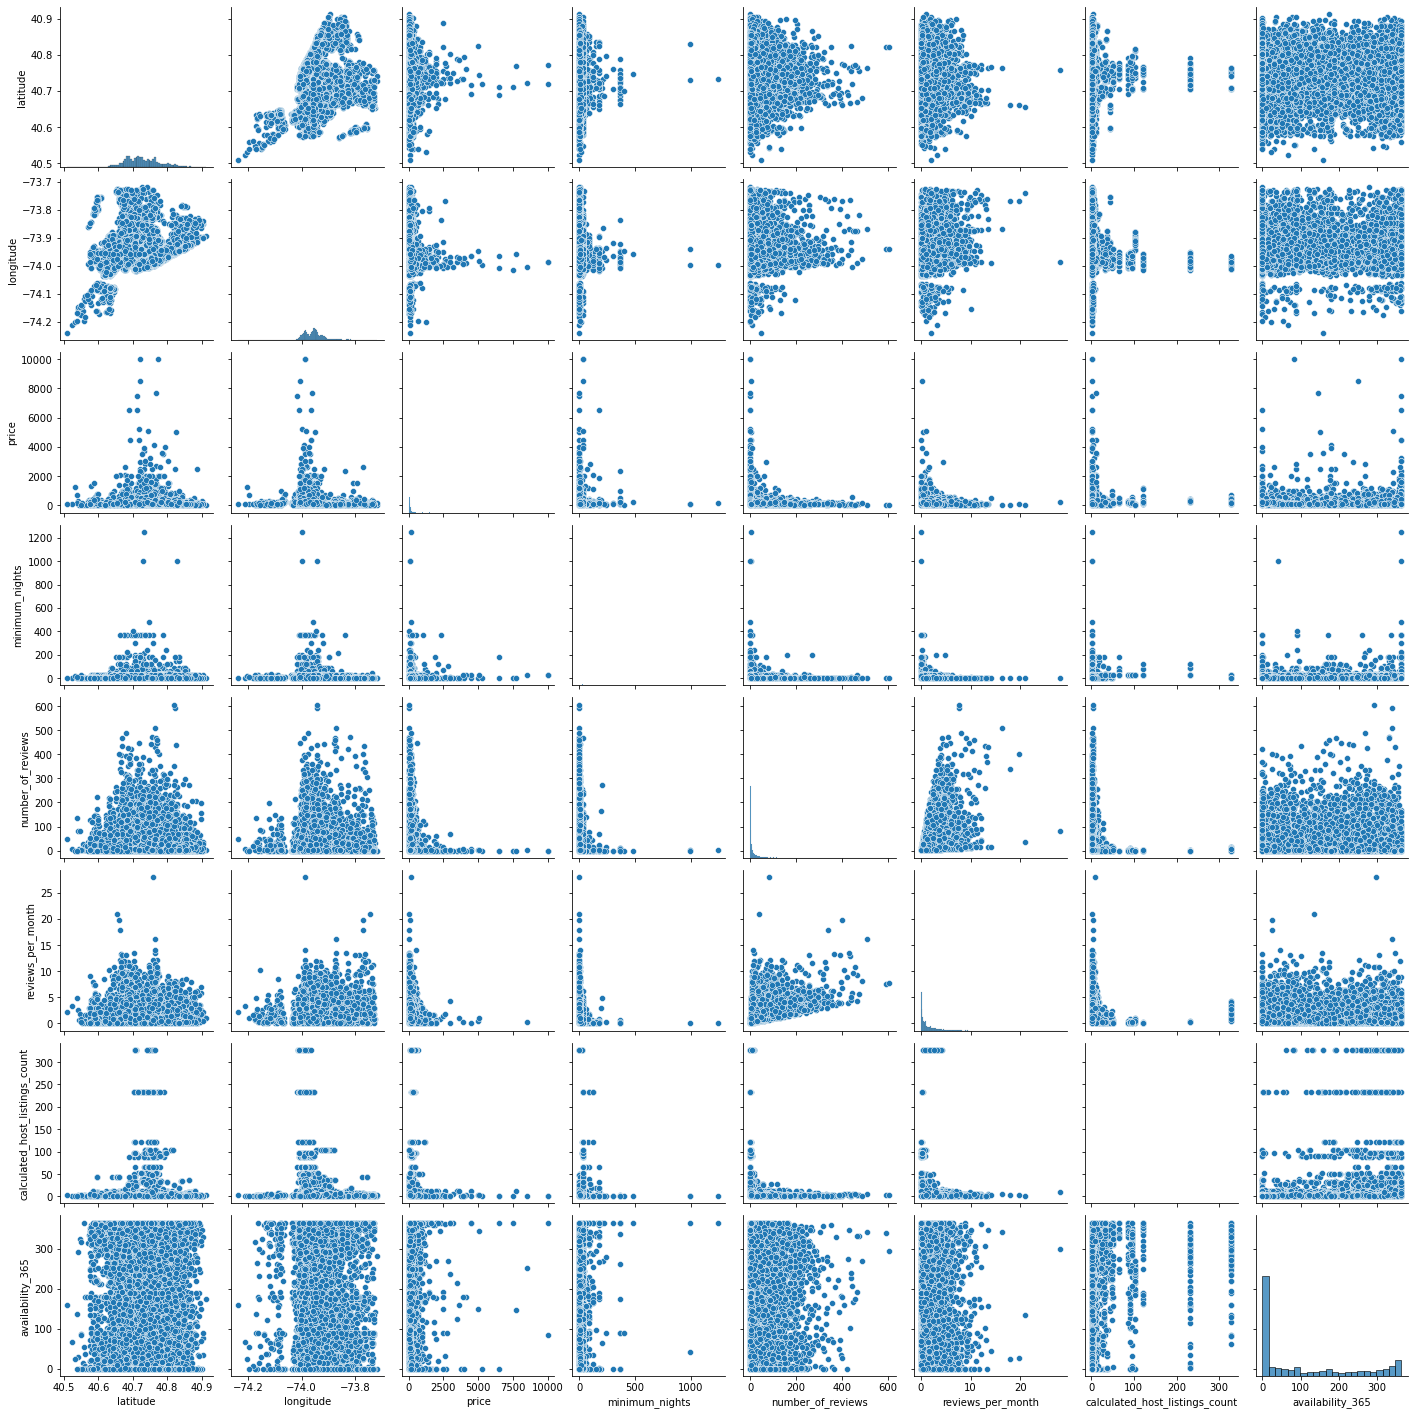

In [34]:
sns.pairplot(df[numeric_columns]);

In [35]:
df[categorical_columns + date_columns].describe()


c:\Users\FelipeVein\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


name host_name neighbourhood_group neighbourhood  \
count            19993     19992               20000         20000   
unique           19768      6517                   5           217   
top     Hillside Hotel     David           Manhattan  Williamsburg   
freq                 7       170                8774          1580   
first              NaN       NaN                 NaN           NaN   
last               NaN       NaN                 NaN           NaN   

              room_type          last_review  
count             20000                15877  
unique                3                 1507  
top     Entire home/apt  2019-06-23 00:00:00  
freq              10384                  575  
first               NaN  2011-05-12 00:00:00  
last                NaN  2019-07-08 00:00:00

### Removing Outliers

When looking the "price" column, we see that there are a lot of outliers. There are some zeros, and some values that are very high. In the problem statement, we are told that after talking to my stakeholders, I decided to consider only prices on a range of 10 to 350 dolars per night. So, we will remove the outliers.

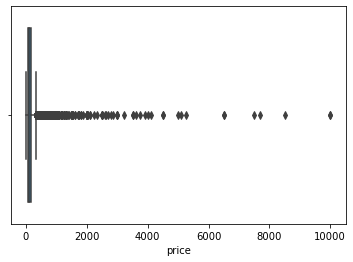

In [36]:
# checking the distribution of price before cleaning
sns.boxplot(x=df['price']);

In [37]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

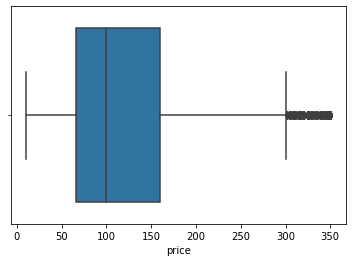

In [38]:
# checking the distribution of price after cleaning
sns.boxplot(x=df['price']);

### Conclusion

Now, we will check if our changes were successful.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

We can see that "last_review" column has been successfully converted to datetime format. 

In addition, the number of data rows was reduced from 20000 to 19001.

In [40]:
run.finish()
